---
toc: false
page-layout: full
---

In [67]:
import pandas as pd

# Week 6A<br>Web Scraping

- Section 401
- Monday, October 9, 2023

## The roadmap

Moving in to our "getting data" modules

- Today: web scraping
- Next week: APIs, Census data, natural language processing
- Then: big data, geo data science in the wild, dashboarding & web servers, machine learning

The final project will ask you to combine several of these topics/techniques to analyze a data sets and produce a web-based data visualization

## Today: web scraping

- Why web scraping? 
- Getting familiar with the Web
- Web scraping: extracting data from static sites
- How to deal with dynamic content

## What is web scraping? 


Using software to gather and extract data/content from websites

## Why is web scraping useful? 

- Not every data source provides an API
- The Web contains **a lot** of information
- Unique data sources that may not be available elsewhere

## What is possible: 11 million rental listings from Craigslist


<center>
<img src="imgs/scraping-craigslist.jpeg" width=700></img>
</center>

[Source: Geoff Boeing](https://geoffboeing.com/2016/08/craigslist-rental-housing-insights/)

## Why isn't web scraping incredibly popular?

- It can be time consuming and difficult to extract large volumes 
- You are at the mercy of website maintainers — if the website structure changes, your code breaks
- Most importantly, there are ethical and legal concerns

<center>
    <img src="imgs/google-search.png" width=700></img>
</center>

## Legal concerns

RadPad scraped the entirety of Craiglist, Craigslist sued RadPad, and they were [awarded $60 million](http://labusinessjournal.com/news/2017/apr/14/radpad-ordered-pay-605-million-judgment-craigslist/)

<center>
<img src="imgs/radpad.png" width=500></img>
</center>

## Two types of legal issues

1. Copyright infringement
    - For example: pictures, rental listing text
2. Terms of Use violations
    - **Unauthorized**: Is scraping prohibited in the website’s terms of use?
    - **Intentional**: Was the person aware of the terms? Did they check an “I agree to these terms” box?
    - **Causes damage**: Did the scraping overload the website, blocking user access?


## Web scraping public sites is legal

- Ruling from 2022 said that scraping data that is publicly accessible on the internet is not a violation of the Computer Fraud and Abuse Act
- Linkedin had sued a competitor for scraping publicly available information from user profiles


[More info on the case](https://techcrunch.com/2022/04/18/web-scraping-legal-court/)

## Some more problematic use cases

- The facial recognition startup Clearview AI scraped billions of photos from social media websites. They [recently settled](https://www.mediapost.com/publications/article/389525/facial-recognition-company-clearview-settles-priva.html) a class action lawsuit that alleged they violated privacy laws
- Web scraping at a massive scale has been a key ingredient in generating the training datasets for generative AI models like ChatGPT. Companies like OpenAI and Meta [have been sued](https://apnews.com/article/openai-lawsuit-authors-grisham-george-rr-martin-37f9073ab67ab25b7e6b2975b2a63bfe) by authors and other content creators for violating copyright laws.


## When is web scraping probably okay?

- .gov sites and, to a lesser degree, .edu sites
- Website owner has no business reason to protect the information
- Not prohibited in terms of use
- Limited number of requests
- Not too many requests all at once
- Done at night, when web traffic is low


## When is it less likely to be okay?

- search engines
- E-commerce sites (e.g. Zillow, Expedia, Amazon)
- Social media
- Prohibited in terms of use
- Large number of requests
- High frequency of requests

**With that being said, let's do some web scraping...**

## A primer on Web definitions

So many acronyms:

- HTML
- The DOM
- CSS

## 1. HTML: HyperText Markup Language

- The language most websites are written in
- The browser knows how to read this language and renders the output for you
- HTML is what a web crawler will see

### HTML tags

- There are a standard set of tags to define the different structural components of a webpage
- For example: 
    - `<h1>`, `<h2>` tags define headers
    - `<p>` tags define paragraphs
    - `<ol>` and `<ul>` are ordered and unordered lists

### Jupyter notebooks can render HTML

Use the `%%html` magic cell command

In [7]:
%%html

<html>
  <head>
    <title>TITLE GOES HERE</title>
  </head>
  <body>
    <h3>MAIN CONTENT GOES IN THE BODY TAG</h3>
    <p>This is a paragraph tag</p>
    <p>This is a second paragraph tag</p>
  </body>
</html>

### Elements, tags, and attributes

Learning the notation:

In [4]:
%%html

<a id="my-link" style="color: orange;" href="https://www.design.upenn.edu" target="blank_">This is my link</a>

**The element:** ![](imgs/atag-1.png)

**The tag:**
![](imgs/atag-2.png)

**The attributes:**

![](imgs/atag-3.png)

### Some attributes have special meaning

- In particular: `id` and `class`
- Allows you to: 
    - select and manipulate specific elements
    - apply styling to specific types of elements

## 2. CSS: Cascading Stylesheets

- A language for styling HTML pages
- CSS styles (also known as selectors) are applied to HTML tags based on their name, class, or ID.

<center>
    <img src="imgs/css.png" width="1200"></img>
</center>

### Basic Web selectors

- Class
    - e.g., `.red`
- ID
    - e.g., `#some-id`
- Tag
    - e.g., `p`, `li`, `div`

- **IDs:** unique identifiers
    - no two elements on a page will have the same ID.
- **Classes:** not unique
    - many elements will have the same class
    - a single element can have multiple classes
    
And many more: look up the syntax when you need it

https://www.w3schools.com/cssref/css_selectors.asp

## 3. The DOM: Document Object Model

- An interactive object tree created from the HTML tag hierarchy on a page
- Created by the browser
- Tracks user interactions
- It is **dynamic**: stores the current state of the webpage 

### Inspecting a webpage

- Modern web browsers provide tools for inspecting the source HTML and DOM of websites
- Also tells you data sources that have been loaded by the page
- This should also be your first step when starting to scrape a page

::: {.callout-tip}
To load the Web Inspector in most modern browsers, you can simply hit the F12 button
:::

![](imgs/web-inspector-1.png)

### The Elements tab

- Allows you to inspect the DOM directly
- The tool that will allow you to identify what data you want to scrape from a website

![](imgs/web-inspector-2.png)

::: {.callout-tip}


### Tip: Viewing an element's source code

1. Right click on the element you want to view
2. Click on "Inspect"
3. The element will be highlighted in the DOM (in the Elements tab)


:::

### The Network tab, or web scraping the easy way



The network tab tracks all of the content loaded by a website. Many modern websites that use data will "fetch" the data from an external (possibly nonpublic) data source. The Network tab will show you these sources, potentially allowing you to get the data without writing any scraping code at all.

#### The places to look
- The `Fetch/XHR` filter: all of the external XLM HTTP fetch requests, often used to load external data
- The `JS` tab: Javascript files loaded by the site, which can sometimes include data
- If you're looking for GeoJSON data, you'll want to look for `.json` files


#### Example 1: [The Prisons Census in Philadelphia](https://www.phila.gov/departments/philadelphia-department-of-prisons/daily-headcount-and-census/)

![](imgs/prison-census.png)

#### Example 2: [Measles data from the WSJ](http://graphics.wsj.com/infectious-diseases-and-vaccines/)

![](imgs/measles.png)

#### Example 3: [Philly 311 Website](https://iframe.publicstuff.com/#?client_id=242)

![](imgs/philly-311.png)

::: {.callout-tip}
When using the Network tab, you can right click on the listed entry in the left. Then, you can either select the "Open in new tab" option or the "Copy response" option. This will let you get the desired data into a new window or copied to your clipboard so you can save it to a file.
:::

## Web scraping demo: Philadelphia Health Inspections

Let's scrape data for restaurant inspections using the searchable database maintained by the Philadelphia Inquirer, available at: [https://data.inquirer.com/inspections/](https://data.inquirer.com/inspections/)

![](imgs/clean-plates.png)

### Getting the HTML content

We'll use the built-in "requests" module to request the content of the website and load it into Python.

In [8]:
import requests

Use a "get" request to get the content:

In [10]:
url = "https://data.inquirer.com/inspections/"
r = requests.get(url)

In [13]:
type(r)

requests.models.Response

In [14]:
r.status_code

200

### BeautifulSoup makes this much more manageable

[BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/) makes it much easier to extract out different parts of a website.

In [15]:
from bs4 import BeautifulSoup

Initialize the "soup" object, using the content of our get request:

In [16]:
soup = BeautifulSoup(r.content, 'html.parser')

### Making the HTML "pretty"

In [17]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="initial-scale=1.0, maximum-scale=1.0, user-scalable=1.0" name="viewport"/>
  <title>
   Clean Plates | The Philadelphia Inquirer
  </title>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="Philadelphia Inquirer" name="publication" property="og:site_name">
   <meta content="noindex" name="robots">
    <meta content="summary" name="twitter:card"/>
    <meta content="@phillyinquirer" name="twitter:site"/>
    <meta content="Clean Plates | The Philadelphia Inquirer" name="title">
     <meta content="Clean Plates | The Philadelphia Inquirer" name="twitter:title"/>
     <meta content="Clean Plates | The Philadelphia Inquirer" name="contenttitle" property="og:title">
      <meta content="Website" name="contenttype">
       <meta content="website" property="o

This is what you'll see if you use the Web Inspector

### How to extract the content we want?

**Two important functions**

1. `soup.select_one(selector)`: finds the first element matching the selector query and returns **one** element
1. `soup.select(selector)`: finds **all** elements matching the selector 

**Recommended reading:** Note on beautiful soup and css selectors in [this week's repository](https://github.com/MUSA-550-Fall-2023/week-6/blob/master/css-selectors.md)

### To the Web Inspector!

We can use the web inspector to understand the structure of the website and identify the HTML tags that we want to extract content from.

### Let's select the first row

Web browsers will let us copy the CSS selector for individual elements.

Use: **Right Click > Copy > Copy Selector**

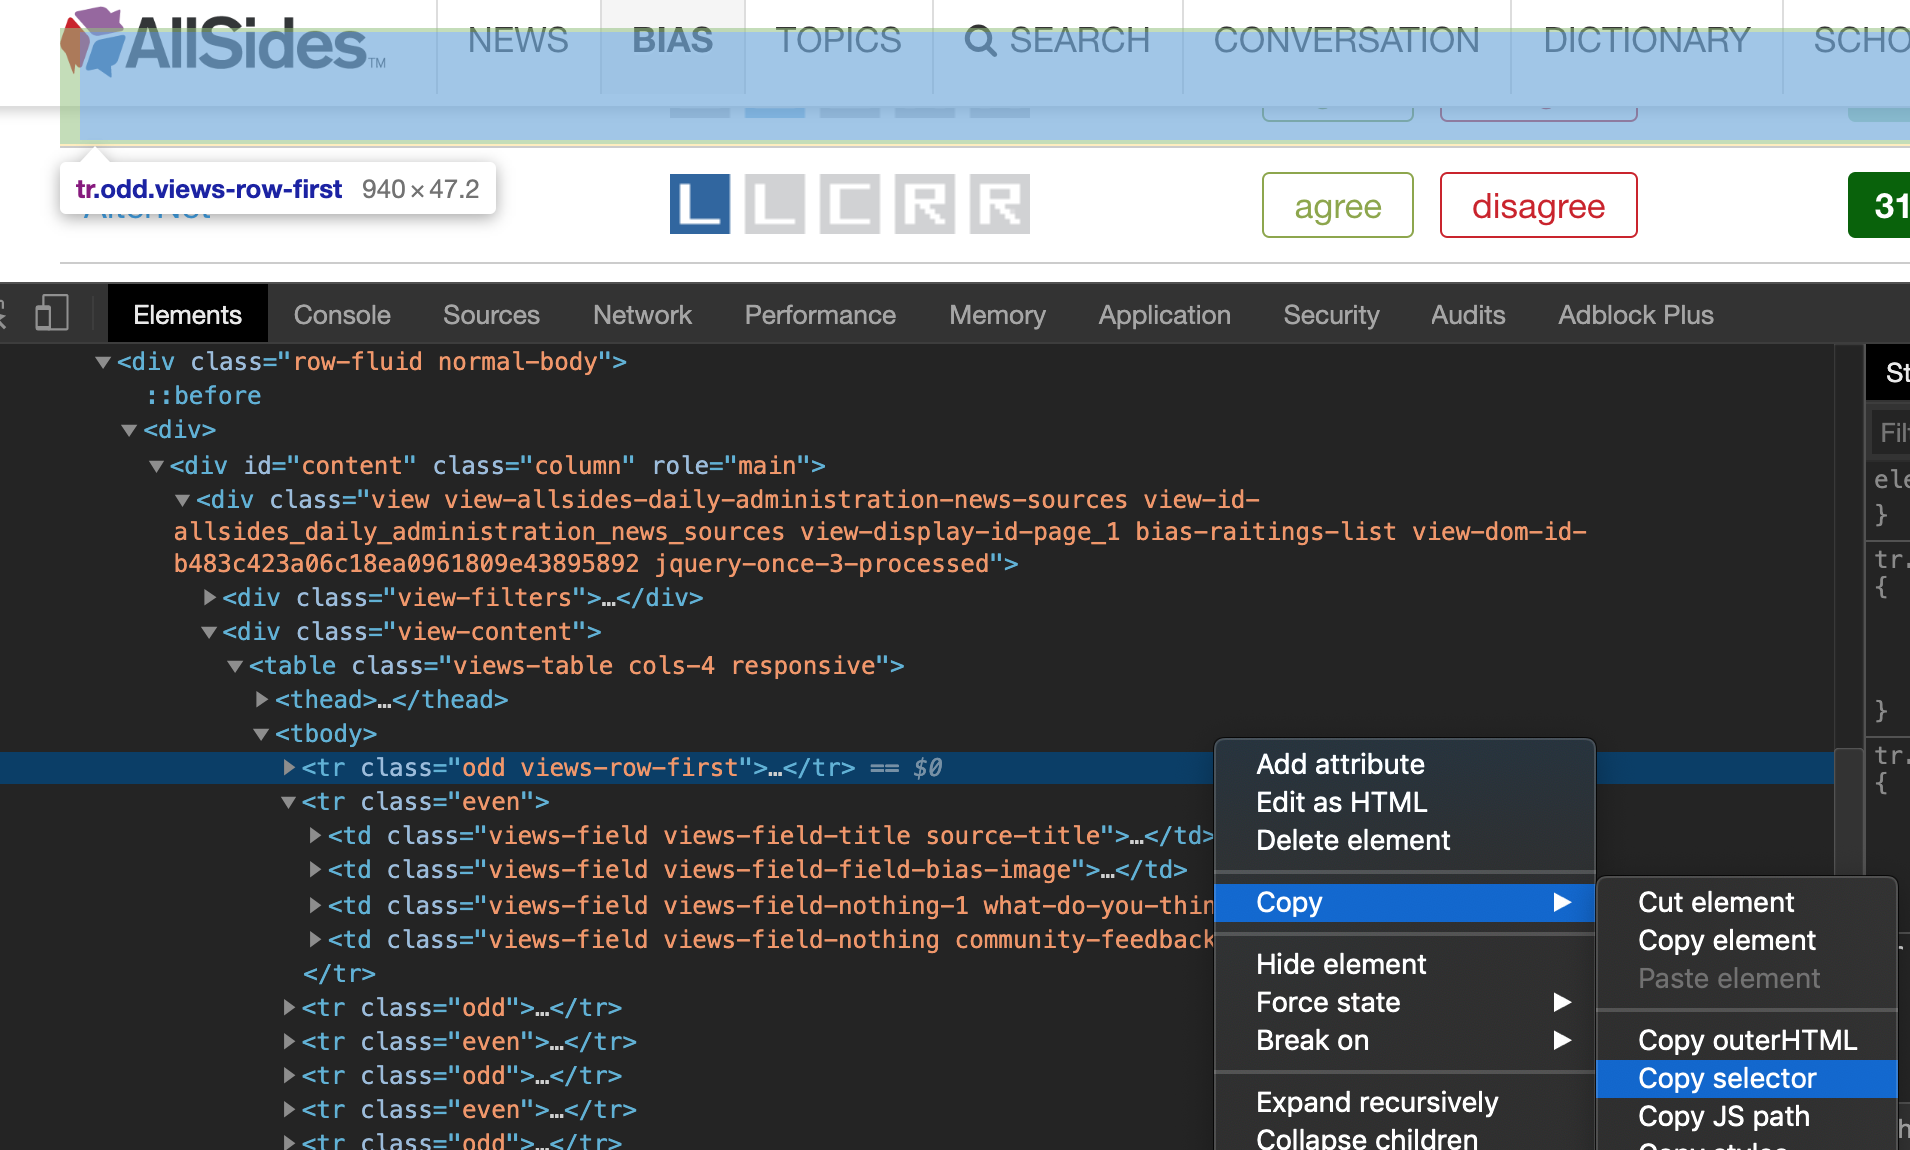

In [18]:
selector = "#inspection_unit_0 > a > div"

In [22]:
# Select the first row
# NOTE: we are using "select_one()" to select only one matching element
first_row = soup.select_one(selector)

In [23]:
first_row

<div class="inspectionUnitInner"><div class="inspectionNameWrapper"><div class="inspectionUnitName transitionAll">New Station Pizza</div><div class="inspectionUnitDate"><span class="inspectionUnitDateTitle">Inspection date:</span> Sep 29, 2023</div><div class="clearAll"></div></div><div class="inspectionUnitInfoWrapper"><div class="inspectionUnitAddress">2206 W HUNTING PARK AVE 19140</div><div class="inspectionUnitNeigborhood"></div><div class="clearAll"></div></div><div class="inspectionUnitCountWrapper"><span class="inspectionCountLabel">Violations</span><li class="inspectionUnitCount inspectionUnitCountFoodborne inspectionUnitCountFirst"><span class="inspectionCountNumber">7</span><span class="inspectionUnitInfoItemTitle"><span class="inspectionUnitInfoItemTitleLabel">Foodborne Illness Risk Factors</span></span></li><li class="inspectionUnitCount inspectionUnitCountRetail"><span class="inspectionCountNumber">14</span><span class="inspectionUnitInfoItemTitle"><span class="inspectionU

### But we need all of the rows!


::: {.callout-important}
When you use Copy -> Copy Selector, the copied css selector will only match the specific element you've highlighted, no others!
:::




#### Generalizing your selectors

We need to **generalize the selector** to just select all rows from the table, not just the first one. To do this, we'll need to go back to the web inspector and understand the structure of the website. 

::: {.callout-tip}
When trying to identify a general selector, try to look for common patterns, like shared class names or id strings, across the tags you want to extract.
:::

In our case, it looks like the "inspectionUnit" class is shared across all of the row div elements

![](imgs/clean-plates-2.png)

In [31]:
# Get all tags with the inspectionUnit class name
# Note we are using select() to select ALL elements
rows = soup.select('.inspectionUnit')

In [32]:
len(rows)

50

In [33]:
# get the first row
row = rows[0]

print(row.prettify())

<div class="inspectionUnit inspectionUnitEven transitionBackground" id="inspection_unit_0">
 <a href="https://data.inquirer.com/inspections/philly/?detail=New%20Station%20Pizza|2206%20W%20HUNTING%20PARK%20AVE%2019140">
  <div class="inspectionUnitInner">
   <div class="inspectionNameWrapper">
    <div class="inspectionUnitName transitionAll">
     New Station Pizza
    </div>
    <div class="inspectionUnitDate">
     <span class="inspectionUnitDateTitle">
      Inspection date:
     </span>
     Sep 29, 2023
    </div>
    <div class="clearAll">
    </div>
   </div>
   <div class="inspectionUnitInfoWrapper">
    <div class="inspectionUnitAddress">
     2206 W HUNTING PARK AVE 19140
    </div>
    <div class="inspectionUnitNeigborhood">
    </div>
    <div class="clearAll">
    </div>
   </div>
   <div class="inspectionUnitCountWrapper">
    <span class="inspectionCountLabel">
     Violations
    </span>
    <li class="inspectionUnitCount inspectionUnitCountFoodborne inspectionUnitCount

### Now, let's extract out the content from each row

We'll look for the following items:

1. The link to the full inspection report
1. The name of the restaurant
1. The restaurant address
1. The number of *food-borne violations*


#### 1. The report link

The link is stored as the "href" attribute of the first "a" element:


In [38]:
a = row.select_one("a")

a

<a href="https://data.inquirer.com/inspections/philly/?detail=New%20Station%20Pizza|2206%20W%20HUNTING%20PARK%20AVE%2019140"><div class="inspectionUnitInner"><div class="inspectionNameWrapper"><div class="inspectionUnitName transitionAll">New Station Pizza</div><div class="inspectionUnitDate"><span class="inspectionUnitDateTitle">Inspection date:</span> Sep 29, 2023</div><div class="clearAll"></div></div><div class="inspectionUnitInfoWrapper"><div class="inspectionUnitAddress">2206 W HUNTING PARK AVE 19140</div><div class="inspectionUnitNeigborhood"></div><div class="clearAll"></div></div><div class="inspectionUnitCountWrapper"><span class="inspectionCountLabel">Violations</span><li class="inspectionUnitCount inspectionUnitCountFoodborne inspectionUnitCountFirst"><span class="inspectionCountNumber">7</span><span class="inspectionUnitInfoItemTitle"><span class="inspectionUnitInfoItemTitleLabel">Foodborne Illness Risk Factors</span></span></li><li class="inspectionUnitCount inspectionUni

Attributes can be extracted from the "attrs" attribute

In [40]:
a.attrs

{'href': 'https://data.inquirer.com/inspections/philly/?detail=New%20Station%20Pizza|2206%20W%20HUNTING%20PARK%20AVE%2019140'}

In [42]:
link = a.attrs['href']

link

'https://data.inquirer.com/inspections/philly/?detail=New%20Station%20Pizza|2206%20W%20HUNTING%20PARK%20AVE%2019140'

#### 2. The restaurant name

Use the "inspectionUnitName" class name to identify the right element.

![](imgs/clean-plates-name.png)

In [44]:
# Use the . to specify class name
name_tag = row.select_one(".inspectionUnitName")

name_tag

<div class="inspectionUnitName transitionAll">New Station Pizza</div>

In [45]:
name = name_tag.text

name

'New Station Pizza'

#### 3. The restaurant address

Use the "inspectionUnitAddress" class name to identify the right element.

![](imgs/clean-plates-address.png)

In [60]:
# Use the . to specify class name
addr_tag = row.select_one(".inspectionUnitAddress")

addr_tag

<div class="inspectionUnitAddress">2206 W HUNTING PARK AVE 19140</div>

In [61]:
address = addr_tag.text

address

'2206 W HUNTING PARK AVE 19140'

#### 4. The number of food-borne violations

It looks like the count number is within an element with class "inspectionCountNumber". BUT: this class is repeated on the retail violations element as well as the food-borne violations element. So, we'll need to use *nested* selectors

First, select elements with the "inspectionUnitCountFoodborne" class name and then the "inspectionCountNumber" class name.

![](imgs/clean-plates-violations.png)

In [48]:
# The number of foodborne violations
count = row.select_one(".inspectionUnitCountFoodborne .inspectionCountNumber")

int(count.text)

7

::: {.callout-caution}
If the violations count is zero, there won't be any element that matches the above selector (the website instead uses a "inspectionUnitCountZero" class. 

If the element doesn't exist, the `select_one()` function will return "None"
:::

### Putting it all together

Now, we can put this code into a for loop and extract out the content from every row on the page:

In [62]:
# Store the data from each row
data = []

# Step 1: Get all rows
rows = soup.select(".inspectionUnit")

# Loop over all rows
for this_row in rows:
    # Step 2: Get the report link
    # Note: we are using the "this_row" variable from the for loop
    a = this_row.select_one("a")
    url = a.attrs["href"]

    # Step 3: Get the name
    name_tag = this_row.select_one(".inspectionUnitName")
    name = name_tag.text

    # Step 4: Get the name
    addr_tag = this_row.select_one(".inspectionUnitAddress")
    address = addr_tag.text

    # Step 5: Get the violation count
    count_tag = this_row.select_one(
        ".inspectionUnitCountFoodborne .inspectionCountNumber"
    )

    # If there were no matches (None was returned), it means the count was zero
    if count_tag is None:
        count = 0
    else:
        count = int(count_tag.text)

    # Step 6: Save it
    data.append(
        {
            "name": name,
            "address": address,
            "foodborne_count": count,
            "url": url,
        }
    )

# Make a dataframe
data = pd.DataFrame(data)

Sort by violation count:

In [64]:
data.sort_values("foodborne_count", ascending=False, ignore_index=True)

,name,address,foodborne_count,url
0,New Station Pizza,2206 W HUNTING PARK AVE 19140,7,https://data.inquirer.com/inspections/philly/?...
1,Constitution Health Plaza / Malvern Behavioral...,1930 S BROAD ST 19145,5,https://data.inquirer.com/inspections/philly/?...
2,La Fusion Restaurant /Bar,1136 S 11TH ST 19147,5,https://data.inquirer.com/inspections/philly/?...
3,Casa Del Buen Gusto,657 E ALLEGHENY AVE 19134,4,https://data.inquirer.com/inspections/philly/?...
4,Little Caesar Pizza #40,2400 W PASSYUNK AVE 19145,4,https://data.inquirer.com/inspections/philly/?...
5,Deluxe Donuts Shop,5241 MARKET ST 19139,4,https://data.inquirer.com/inspections/philly/?...
6,Carolina Market,2952 RIDGE AVE 19121,4,https://data.inquirer.com/inspections/philly/?...
7,Apple Tree Child Care/ Learning Center,3665 E CROWN AVE 19114,4,https://data.inquirer.com/inspections/philly/?...
8,Bar Symon (Terminal D),8500 ESSINGTON AVE SPC D-11 19153,3,https://data.inquirer.com/inspections/philly/?...
9,New Qing Garden,2401 S 10TH ST 19148,3,https://data.inquirer.com/inspections/philly/?...


### See any restaurants you recognize?

## That's it!


**Next time:** how to scrape dynamic content!